<a href="https://colab.research.google.com/github/afclopes/BSseq-mtDNAhet-SupportingMaterial/blob/main/SingleCell_SearchMtDNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Does BS-seq give information about mitochondrial DNA?

The question is whether BS-seq also sequences mitochondrial DNA. Based on the paper https://www.nature.com/articles/nmeth.3728#Sec1 (let's call it paper 1) and https://www.nature.com/articles/nmeth.3035#accession-codes (paper 2) there seems to be no reason in theory for this not to be the case. It appears that the entire genome is fragmented and sequenced. And there is no removal of mitochondrial DNA at any point. Thus, there should be sequenced mitochondrial DNA.

## Can we find evidence of mitochondrial DNA in the supplementary data for paper 1?

Paper 1, Supplementary Table 4 described as "Gene-level results of the association tests between DNA-methylation variation in alternative genomic contexts and gene expression variation. (XLSX 21480 kb)".

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 41592_2016_BFnmeth3728_MOESM611_ESM.csv to 41592_2016_BFnmeth3728_MOESM611_ESM.csv


In [ ]:
#let's start by installing packages we will likely be using
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import io
supplementary_table_4=pd.read_csv(io.BytesIO(uploaded['41592_2016_BFnmeth3728_MOESM611_ESM.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
supplementary_table_4.head()

,name,r,r_lo,r_up,p,n,n_wtd,p_fdr,p_rnd,p_adj,ens_id,gene_id,chromo,start_gene,end_gene,start_context,end_context,strand,pluri
0,cpg_mean,-0.137998,-0.370096,0.094100,0.288877,61,61,0.619949,0.619949,0.619949,ENSMUSG00000069045,Ddx3y,Y,1260715,1286613,1,1,-,False
1,cpg_mean,-0.066585,-0.300405,0.167235,0.610155,61,61,0.827108,0.827108,0.827108,ENSMUSG00000068457,Uty,Y,1096861,1245759,1,1,-,False
2,cpg_mean,-0.023458,-0.257734,0.210818,0.857587,61,61,0.953853,0.953853,0.953853,ENSMUSG00000069049,Eif2s3y,Y,1010543,1028847,1,1,+,False
3,gene_body,-0.357736,-0.654877,-0.060596,0.037781,34,473,0.736332,0.736332,0.736332,ENSMUSG00000069045,Ddx3y,Y,1260715,1286613,1260715,1286613,-,False
4,gene_body,0.103351,-0.223523,0.430224,0.573510,32,166,0.986958,0.986958,0.986958,ENSMUSG00000069049,Eif2s3y,Y,1010543,1028847,1010543,1028847,+,False


In [ ]:
supplementary_table_4['chromo'].unique()

array(['Y', 'X', '19', '18', '17', '16', '15', '14', '13', 13, 12, 11, 10,
       9, 8, 7, 6, 5, 4, 3, 2, 1], dtype=object)

It appears that this paper removed on purpose chromosomes 20 and 21 and the mitochondrial DNA data as it is not present here any indications of these chromosomes.

## Can we find evidence for mitochondrial DNA in the  raw data available for paper 1?

Raw data for this paper was saved under Series GSE68642. Inside this series there is one Platform called GPL13112 carried out using Illumina HiSeq 2000 (Mus musculus), and 96 Samples with names like GSM1922083 Serum_A01 [BS-seq]. At random, I have picked one to look at.

Details of the sample:

Organism: Mus musculus

Characteristics cell line: E14

cell type: embryonic stem cell

strain/background: C57BL/6

genotype/variation: wild-type

growth condition: serum/LIF

Growth protocol 	ESCs were cultured in serum/LIF 

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#P1_raw_data_H10=pd.read_csv(io.BytesIO(uploaded['GSM1922176_H10.CpG.txt']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

path = "/content/drive/My Drive/UniversityCambridge/Cambridge_Data/GSM1922176_H10.CpG.txt"
df_raw_data_H10 = pd.read_csv(path,sep='\t',header=None)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_raw_data_H10.head()

,0,1,2,3,4,5,6
0,17,3000204,+,0,0,CG,CGT
1,17,3000205,-,0,0,CG,CGA
2,17,3000350,+,0,0,CG,CGA
3,17,3000351,-,0,0,CG,CGC
4,17,3000417,+,0,0,CG,CGA


In [ ]:
df_raw_data_H10.columns=["chromosome","position","strand","count methylated","count non-methylated","C-context","trinucleotide context"]
df_raw_data_H10.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context
0,17,3000204,+,0,0,CG,CGT
1,17,3000205,-,0,0,CG,CGA
2,17,3000350,+,0,0,CG,CGA
3,17,3000351,-,0,0,CG,CGC
4,17,3000417,+,0,0,CG,CGA


In [ ]:
df_raw_data_H10.chromosome.unique()

array([17, 19, 7, 4, 8, 1, 5, 13, 3, 2, 6, 14, 18, 16, 10, 11, 9, 15, 12,
       '12', 'X', 'Y', 'MT'], dtype=object)

Where are chromosome 20, 21 and 22?

In [ ]:
df_raw_data_H10_mitochondria=df_raw_data_H10[df_raw_data_H10['chromosome']=='MT']

## Can we find evidence for sequencing the mtDNA at position 5024?

In [ ]:
df_raw_data_H10_mitochondria

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context
43735100,MT,134,+,2,2,CG,CGG
43735101,MT,135,-,7,3,CG,CGG
43735102,MT,229,+,3,1,CG,CGG
43735103,MT,230,-,3,4,CG,CGT
43735104,MT,263,+,1,0,CG,CGA
...,...,...,...,...,...,...,...
43735669,MT,16012,-,6,13,CG,CGG
43735670,MT,16251,+,2,0,CG,CGT
43735671,MT,16252,-,1,1,CG,CGG
43735672,MT,16282,+,2,0,CG,CGC


In [ ]:
df_raw_data_H10_mitochondria.dtypes

chromosome               object
position                  int64
strand                   object
count methylated          int64
count non-methylated      int64
C-context                object
trinucleotide context    object
dtype: object

In [ ]:

df_raw_data_H10_mitochondria['position'].astype(str)

df_raw_data_H10_mitochondria.dtypes


chromosome               object
position                  int64
strand                   object
count methylated          int64
count non-methylated      int64
C-context                object
trinucleotide context    object
dtype: object

In [ ]:
df_raw_data_H10_mitochondria[df_raw_data_H10_mitochondria['position'].str.contains('5024')]

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context


Does not seem like the position we are looking for is found in this data. But can we get closer to the position?

In [ ]:
df_raw_data_H10_mitochondria[df_raw_data_H10_mitochondria['position'].str.contains('5')]

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context
43735101,MT,135,-,7,3,CG,CGG
43735106,MT,305,+,1,1,CG,CGT
43735114,MT,351,+,0,1,CG,CGG
43735115,MT,352,-,0,5,CG,CGA
43735116,MT,354,+,0,1,CG,CGT
...,...,...,...,...,...,...,...
43735665,MT,15985,-,5,10,CG,CGT
43735666,MT,15992,+,0,1,CG,CGG
43735667,MT,15993,-,7,13,CG,CGT
43735670,MT,16251,+,2,0,CG,CGT


Too many to look at. I am looking for position 5024.

In [ ]:
df_raw_data_H10_mitochondria[df_raw_data_H10_mitochondria['position'].str.contains('50')]

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context
43735206,MT,2502,+,0,0,CG,CGT
43735207,MT,2503,-,1,2,CG,CGT
43735219,MT,2650,-,0,3,CG,CGT
43735228,MT,2850,+,1,0,CG,CGA
43735238,MT,3150,+,4,0,CG,CGA
43735454,MT,9505,+,0,0,CG,CGC
43735455,MT,9506,-,0,0,CG,CGT
43735612,MT,14507,+,4,1,CG,CGC
43735613,MT,14508,-,6,6,CG,CGA
43735636,MT,15081,+,13,0,CG,CGA


How about positions starting with number 5?

In [ ]:
df_raw_data_H10_mitochondria[df_raw_data_H10_mitochondria['position'].str.contains('\A5')]

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context
43735124,MT,596,+,7,1,CG,CGG
43735125,MT,597,-,5,9,CG,CGC
43735298,MT,5113,+,0,0,CG,CGA
43735299,MT,5114,-,0,4,CG,CGT
43735300,MT,5167,+,3,0,CG,CGC
43735301,MT,5168,-,0,2,CG,CGG
43735302,MT,5170,+,3,0,CG,CGA
43735303,MT,5171,-,0,2,CG,CGG
43735304,MT,5186,+,2,1,CG,CGG
43735305,MT,5187,-,1,1,CG,CGC


Not exactly what I want yet. Which means my position exactly is not being measured. What is the closest position to my number being measured?

In [ ]:
df_raw_data_H10_mitochondria['position'].unique()

array(['134', '135', '229', '230', '263', '264', '305', '306', '317',
       '318', '319', '320', '327', '328', '351', '352', '354', '355',
       '361', '362', '441', '442', '470', '471', '596', '597', '635',
       '636', '645', '646', '685', '686', '745', '746', '898', '899',
       '907', '908', '911', '912', '963', '964', '984', '985', '1185',
       '1186', '1214', '1215', '1333', '1334', '1343', '1344', '1376',
       '1377', '1429', '1430', '1553', '1554', '1635', '1636', '1772',
       '1773', '1774', '1775', '1786', '1787', '1871', '1872', '1912',
       '1913', '1928', '1929', '2003', '2004', '2007', '2008', '2009',
       '2010', '2021', '2022', '2071', '2072', '2079', '2080', '2155',
       '2156', '2247', '2248', '2262', '2263', '2281', '2282', '2356',
       '2357', '2383', '2384', '2408', '2409', '2424', '2425', '2430',
       '2431', '2477', '2478', '2488', '2489', '2502', '2503', '2520',
       '2521', '2535', '2536', '2552', '2553', '2567', '2568', '2605',
       '26

So the closest values to 5024 that we have are 4975 and 5113.

From 5024 to 4975 is just 49 base pairs. The question now is whether a fragment that starts at this position, will be longer than 50bp to be able to cover the region of interest.

In [ ]:
df_raw_data_H10_mitochondria[df_raw_data_H10_mitochondria['position']=='4975']

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context
43735297,MT,4975,-,8,10,CG,CGC


Considering that the fragment starting at 4975 has 8 methylated sites and 10 non-methylated sites, it is very likely that it will span the area of interest. The question now is whether we can find a file from this experiment that shows us the data where we can track the sequence starting at position 4975 and see if it is long enough. But for this, it appears that I will have to open a file with extension .cov.gz which appears to be only openable in R but not in python.

Turns out I was wrong! These 10 non-methylated sites and 8 methylated sites are how many were measured for the specific sites, which means that in total only 18 reads were used. I wonder if this number of reads is usual for mitochondria and for nuclear sites.

According to the Illumina website (https://www.illumina.com/documents/products/technotes/technote_coverage_calculation.pdf) "the level of coverage for human genome mutations/SNPs/rearrangements detection that most publications require is from 10× to 30× depth of coverage depending on the application and statistical model." Another paper (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4344394/) also states that "for DMR identification using the sample types analyzed in this study, we recommend per sample coverage in the range of 5× to 15×, depending on the magnitude of methylation differences between the groups and whether a smoothing or single CpG based DMR identification strategy is used. Sequencing at levels higher than this range leads to wasted resources that would be better spent on an increased number of biological replicates."

From this we can conclude that 18 reads that we observed is not bad.


## What is the average number of reads at CpG sites in mitochondria?

In [ ]:
df_raw_data_H10['total count']=df_raw_data_H10['count methylated']+df_raw_data_H10['count non-methylated']

df_raw_data_H10.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
0,17,3000204,+,0,0,CG,CGT,0
1,17,3000205,-,0,0,CG,CGA,0
2,17,3000350,+,0,0,CG,CGA,0
3,17,3000351,-,0,0,CG,CGC,0
4,17,3000417,+,0,0,CG,CGA,0


In [ ]:
df_raw_data_H10_mitochondria2=df_raw_data_H10[df_raw_data_H10['chromosome']=='MT']

In [ ]:
df_raw_data_H10_mitochondria2.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
43735100,MT,134,+,2,2,CG,CGG,4
43735101,MT,135,-,7,3,CG,CGG,10
43735102,MT,229,+,3,1,CG,CGG,4
43735103,MT,230,-,3,4,CG,CGT,7
43735104,MT,263,+,1,0,CG,CGA,1


In [ ]:
df_raw_data_H10_mitochondria2.mean()

position                7735.019164
count methylated           3.818815
count non-methylated       3.524390
total count                7.343206
dtype: float64

## Coverage graph of mitochondria

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

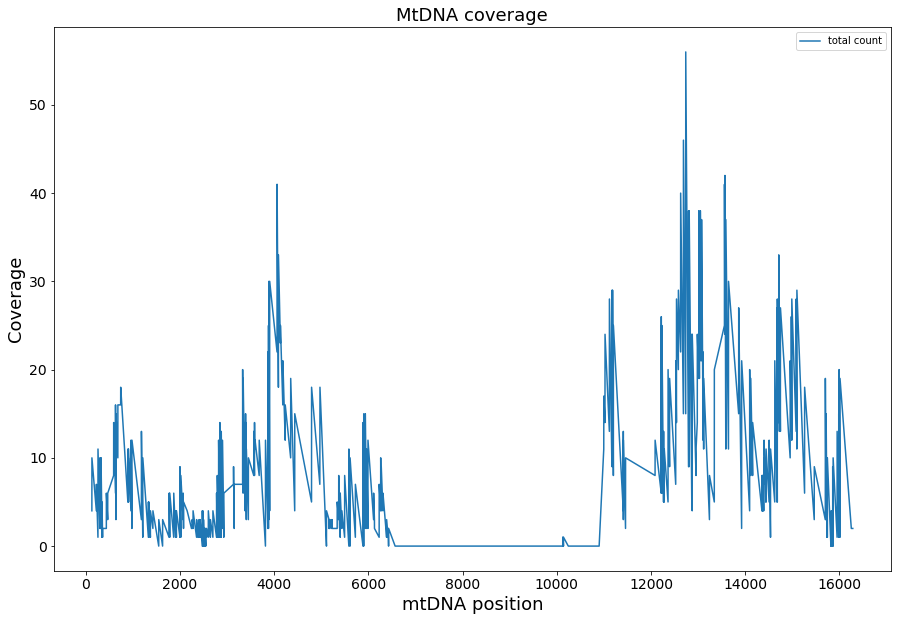

In [ ]:
df_raw_data_H10_mitochondria2.plot(kind='line',y="total count",x="position",figsize=(15,10),)
plt.xlabel("mtDNA position",fontsize=18)
plt.ylabel("Coverage",fontsize=18)
plt.title('MtDNA coverage',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### What is the average number of reads at CpG sites NOT in mitochondria?

In [ ]:
df_raw_data_H10_nucleus=df_raw_data_H10[df_raw_data_H10['chromosome']!='MT']
df_raw_data_H10_nucleus.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
0,17,3000204,+,0,0,CG,CGT,0
1,17,3000205,-,0,0,CG,CGA,0
2,17,3000350,+,0,0,CG,CGA,0
3,17,3000351,-,0,0,CG,CGC,0
4,17,3000417,+,0,0,CG,CGA,0


In [ ]:
#this plot is too computationally difficult to do on collab
#df_raw_data_H10_nucleus.plot(kind='line',y="total count",x="position",figsize=(15,10),)
#plt.xlabel("nuclear DNA position",fontsize=18)
#plt.ylabel("Coverage",fontsize=18)
#plt.title('Nuclear DNA coverage',fontsize=18)

In [ ]:
#plotting the reads of a random chromosome, eg 10.
df_raw_data_H10_nucleus_chr10=df_raw_data_H10[df_raw_data_H10['chromosome']==10]
df_raw_data_H10_nucleus_chr10.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
30430438,10,3100022,+,0,0,CG,CGA,0
30430439,10,3100023,-,0,0,CG,CGG,0
30430440,10,3100161,+,0,0,CG,CGA,0
30430441,10,3100162,-,0,0,CG,CGC,0
30430442,10,3100242,+,0,0,CG,CGG,0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text major ticklabel objects>)

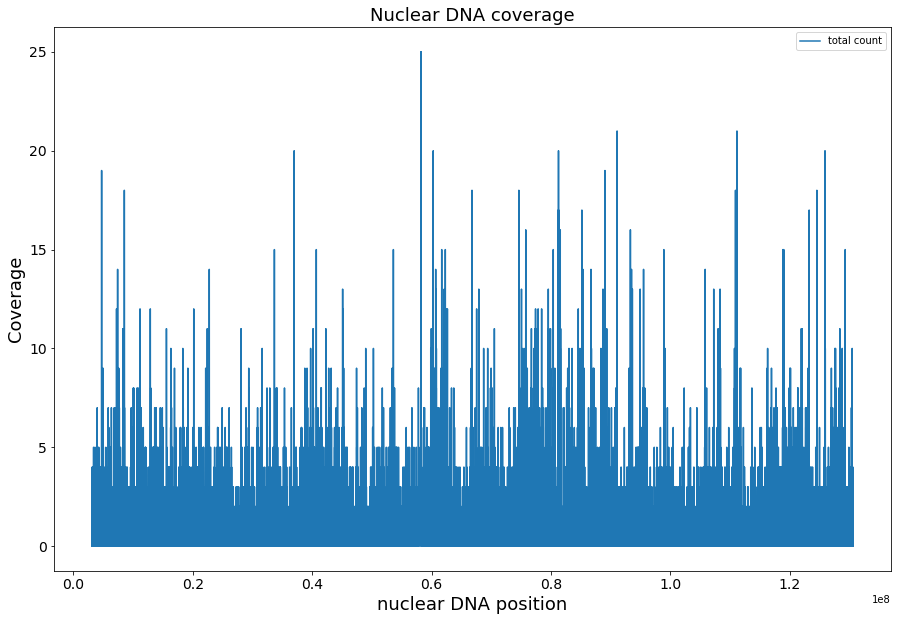

In [ ]:
df_raw_data_H10_nucleus_chr10.plot(kind='line',y="total count",x="position",figsize=(15,10),)
plt.xlabel("nuclear DNA position",fontsize=18)
plt.ylabel("Coverage",fontsize=18)
plt.title('Nuclear DNA coverage',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(0.0, 60.0)

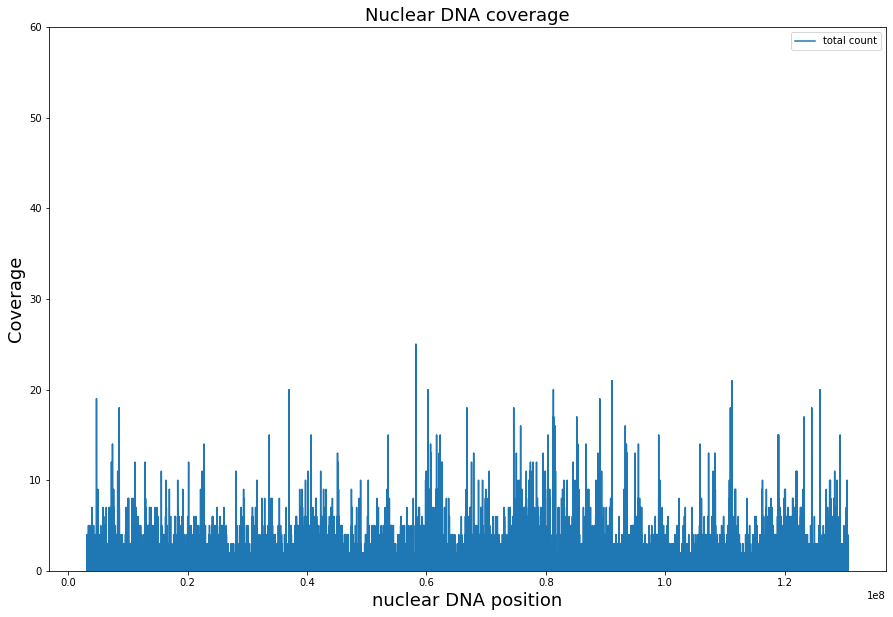

In [ ]:
df_raw_data_H10_nucleus_chr10.plot(kind='line',y="total count",x="position",figsize=(15,10),)
plt.xlabel("nuclear DNA position",fontsize=18)
plt.ylabel("Coverage",fontsize=18)
plt.title('Nuclear DNA coverage',fontsize=18)
plt.ylim(0,60)

In [ ]:
df_raw_data_H10_nucleus['total count'].mean()

Strange average result. Let's look at this in another way.

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='chromosome',y='total count',data=df_raw_data_H10)

Why are there two chr 12 and no chr 20, 21 or 22?

### Redo -0: What is the average number of reads for sites where methylation was measured?

We saw that some sites showed no values for methylation or non-methylation. Let's see if the values change once we remove all CpG sites analysed which had zero count for methylation or non-methylation.

In [ ]:
df_raw_data_H10_no_zeros=df_raw_data_H10[df_raw_data_H10['total count']>0]
df_raw_data_H10_no_zeros.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
228,17,3022384,+,1,0,CG,CGT,1
278,17,3028112,+,1,0,CG,CGG,1
280,17,3028142,+,1,0,CG,CGT,1
987,17,3077574,-,3,0,CG,CGA,3
989,17,3077617,-,6,0,CG,CGT,6


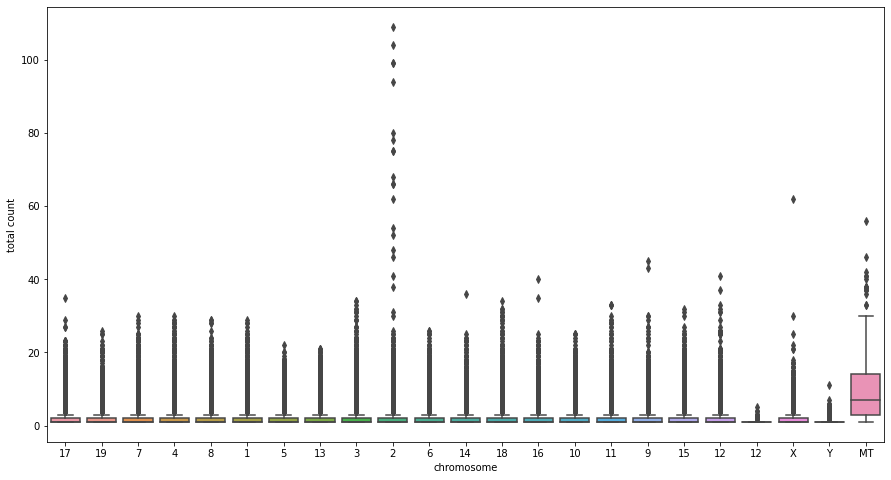

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='chromosome',y='total count',data=df_raw_data_H10_no_zeros)

In [ ]:
df_raw_data_H10_no_zeros['total count'].mean()

1.7153495576290954

In [ ]:
df_raw_data_H10_no_zeros['total count'].median()

1.0

### Redo -0: What is the average number of reads at CpG sites in mitochondria?

In [ ]:
df_raw_data_H10_no_zeros_mitochondria=df_raw_data_H10_no_zeros[df_raw_data_H10_no_zeros['chromosome']=='MT']

In [ ]:
df_raw_data_H10_no_zeros_mitochondria['total count'].mean()

10.156626506024097

In [ ]:
df_raw_data_H10_no_zeros_mitochondria['total count'].median()

7.0

### Redo -0: What is the average number of reads at CpG sites NOT in mitochondria?

In [ ]:
df_raw_data_H10_no_zeros_nucleus=df_raw_data_H10_no_zeros[df_raw_data_H10_no_zeros['chromosome']!='MT']

In [ ]:
df_raw_data_H10_no_zeros_nucleus['total count'].mean()

1.7138891309178335

In [ ]:
df_raw_data_H10_no_zeros_nucleus['total count'].median()

1.0

### Redo >5: What is the average number of reads for sites where methylation was measured?

Values that are below perhaps 5 for the count of methylated and non-methylated sites, should be dubious for us to trust that the sequencing worked. It could be that I am being a bit strict here as some studies use as little as 3 sites to consider a decent coverage.

In [ ]:
df_raw_data_H10_filtered=df_raw_data_H10[df_raw_data_H10['total count']>5]
df_raw_data_H10_filtered.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
989,17,3077617,-,6,0,CG,CGT,6
1089,17,3081966,-,13,0,CG,CGC,13
1091,17,3082129,-,2,4,CG,CGC,6
1095,17,3082311,-,7,1,CG,CGA,8
19021,17,4216875,-,6,0,CG,CGG,6


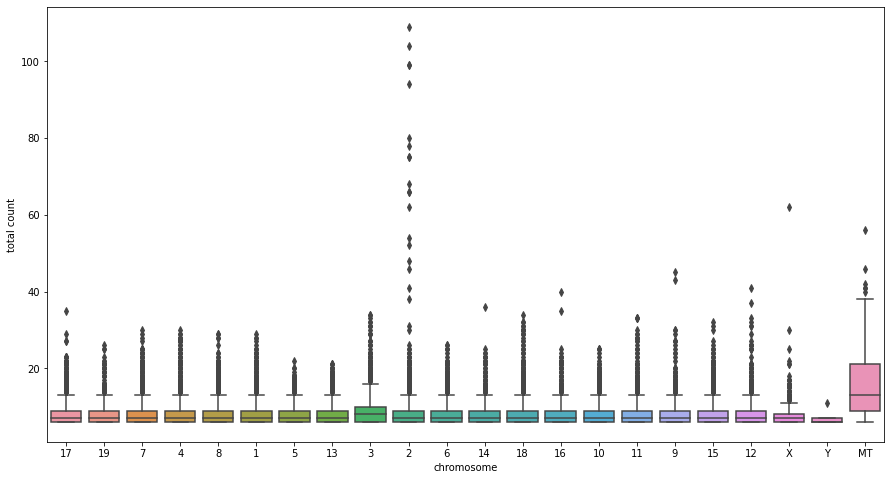

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='chromosome',y='total count',data=df_raw_data_H10_filtered)

In [ ]:
df_raw_data_H10_filtered.mean()

position                7.674268e+07
count methylated        1.933100e+00
count non-methylated    6.297131e+00
total count             8.230230e+00
dtype: float64

In [ ]:
df_raw_data_H10_filtered.median()

position                75317714.0
count methylated               0.0
count non-methylated           7.0
total count                    7.0
dtype: float64

### Redo >5: What is the average number of reads at CpG sites in mitochondria?

In [ ]:
df_raw_data_H10_filtered_mitochondria=df_raw_data_H10_filtered[df_raw_data_H10_filtered['chromosome']=='MT']

In [ ]:
df_raw_data_H10_filtered_mitochondria.mean()

position                8855.812766
count methylated           7.948936
count non-methylated       7.957447
total count               15.906383
dtype: float64

In [ ]:
df_raw_data_H10_filtered_mitochondria.median()

position                11202.0
count methylated            7.0
count non-methylated        6.0
total count                13.0
dtype: float64

### Redo >5: What is the average number of reads at CpG sites NOT in mitochondria?

In [ ]:
df_raw_data_H10_filtered_nucleus=df_raw_data_H10_filtered[df_raw_data_H10_filtered['chromosome']!='MT']
df_raw_data_H10_filtered_nucleus.head()

,chromosome,position,strand,count methylated,count non-methylated,C-context,trinucleotide context,total count
989,17,3077617,-,6,0,CG,CGT,6
1089,17,3081966,-,13,0,CG,CGC,13
1091,17,3082129,-,2,4,CG,CGC,6
1095,17,3082311,-,7,1,CG,CGA,8
19021,17,4216875,-,6,0,CG,CGG,6


In [ ]:
df_raw_data_H10_filtered_nucleus.mean()

position                7.700344e+07
count methylated        1.912656e+00
count non-methylated    6.291488e+00
total count             8.204144e+00
dtype: float64

In [ ]:
df_raw_data_H10_filtered_nucleus.median()

position                75579993.0
count methylated               0.0
count non-methylated           7.0
total count                    7.0
dtype: float64

Overall, mitochondria has more reads than the nucleus according to its mean and media, which is as expected, considering that the mitochondria has more copies of DNA. Both mean and median were measured, because often with skewed data median measures are more informative.

In [ ]:
#percentage of coverage of CpG
(len(df_raw_data_H10_filtered)/len(df_raw_data_H10))*100

0.15865080757644204

In [ ]:
len(df_raw_data_H10_filtered)

69387

In [ ]:
len(df_raw_data_H10)

43735674

In [ ]:
(len(df_raw_data_H10_no_zeros)/len(df_raw_data_H10))*100

5.485494518730865

This suggests that only between 5-0.1% of the data is being used and has a CpG site which is being analysed.

According to literature (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5333175/): "The total number of CpG sites in human genome comprises around 28.3 million instances. That is less than 1% of genome compared with 4.4% expected given 42% GC content due to C- > T mutation shift following the frequent 5′ cytosine deamination in CG doublet."

It could be that many cases of methylated and non-methylated sites were zero, because in this sequence there were no CpG sites but instead there were CpH sites, like CHG or CHH. And CpH site analysis are not being shown in this table.

### What other sites of methylation are there in the samples? 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving samples_stats.csv to samples_stats.csv


In [ ]:
import io
CpH_sites_sample_stats=pd.read_csv(io.BytesIO(uploaded['samples_stats.csv']),sep='\t')

In [ ]:
CpH_sites_sample_stats.head(25)

,id,loc_id,type,cov,trimmed_seq,unique_mappend_reads,ncpgs,Total Reads,Aligned Reads,mapping%,Unaligned Reads,Ambiguously Aligned Reads,No Genomic Sequence,Duplicate Reads (removed),Unique Reads (remaining),duplication%,Total Cs,Methylated CpGs,Unmethylated CpGs,CpG rate,Methylated CpHs,Unmethylated CpHs,CpH rate,Methylated CHHs,Unmethylated CHHs,CHH rate
0,CSCP3_SERUM_A01,A01,Serum,0.074412,18041221,1851505,1627223,9020610.5,1128138.5,0.125326,7417425.5,475046.5,0.0,202386.0,925752.5,0.179426,22038140.5,888573.0,559425.0,0.613655,163438.5,5567724.0,0.028516,596535.0,14262445.0,0.040149
1,CSCP3_SERUM_A02,A02,Serum,0.114713,38063928,3406701,2508524,19031964.0,2439634.5,0.128444,15580241.0,1012088.5,0.0,736284.0,1703350.5,0.301803,40434858.5,1652377.0,890864.5,0.649712,279487.5,10190147.0,0.026693,1094832.0,26327150.5,0.039930
2,CSCP3_SERUM_B01,B01,Serum,0.135118,18939764,3789389,2954740,9469882.0,2180357.5,0.230464,6729381.0,560143.5,0.0,285663.0,1894694.5,0.131049,47079020.0,1981949.0,1334720.0,0.597564,368028.5,12076852.5,0.029571,942765.5,30374704.5,0.030113
3,CSCP3_SERUM_B02,B02,Serum,0.260894,53525363,10140419,5705190,26762681.5,6604611.5,0.247016,18672313.0,1485757.0,0.0,1534402.0,5070209.5,0.232304,126052402.5,5375067.5,3489054.0,0.606393,418880.5,32822913.0,0.012599,1719842.5,82226645.0,0.020493
4,CSCP3_SERUM_C01,C01,Serum,0.097257,15801435,2602656,2126803,7900717.5,1546883.0,0.196095,5913159.0,440675.5,0.0,245555.0,1301328.0,0.158775,32177362.5,1348031.0,870784.0,0.607539,152045.0,8261138.0,0.018070,499407.0,21045957.5,0.023184
5,CSCP3_SERUM_C02,C02,Serum,0.181255,32904883,5633346,3963645,16452441.5,3699808.5,0.225170,11857508.0,895125.0,0.0,883135.5,2816673.0,0.238636,70623359.5,2574096.0,2636362.0,0.494032,268984.5,18270571.0,0.014507,1004585.5,45868760.5,0.021434
6,CSCP3_SERUM_D01,D01,Serum,0.118765,17779009,3356695,2597143,8889504.5,1958442.5,0.220569,6423438.0,507623.5,0.5,280095.0,1678347.5,0.143043,41559073.0,1725796.5,1133826.0,0.603500,171429.5,10759136.5,0.015682,590310.5,27178574.0,0.021264
7,CSCP3_SERUM_D02,D02,Serum,0.265879,54366978,10429267,5814199,27183489.0,6826591.0,0.251390,18765539.0,1591359.0,0.0,1611957.5,5214633.5,0.236078,128215344.5,5274961.0,3694539.0,0.588123,446175.5,33223422.5,0.013250,1779648.0,83796598.5,0.020801
8,CSCP3_SERUM_E01,E01,Serum,0.095899,9699844,2086989,2097108,4849922.0,1172343.5,0.241945,3408920.5,268658.0,0.0,128849.0,1043494.5,0.109863,26361625.5,778233.0,1193861.0,0.394627,97556.5,6845777.5,0.014050,348497.0,17097700.5,0.019975
9,CSCP3_SERUM_E02,E02,Serum,0.063487,10743612,1368443,1388322,5371806.0,765482.5,0.142663,4359891.5,246432.0,0.0,81261.0,684221.5,0.106139,16907257.0,696151.5,503461.5,0.580315,86003.0,4312283.5,0.019553,372412.0,10936945.5,0.032930


The previous calculation showed a coverage of 0.158% while in this table we see 0.125% of coverage for CpG sites. These values are close enough to be reassuring, especially considering that this table probably includes in the total sequences analysed also the ones involving CpH sites. Most samples show a coverage between 0.05 and 0.25%.

# Defining MAPQ cutoff threshold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MAPQ_threshold.csv to MAPQ_threshold.csv


In [ ]:
#let's start by installing packages we will likely be using
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
MAPQ_threshold=pd.read_csv(io.BytesIO(uploaded['MAPQ_threshold.csv']))

In [ ]:
MAPQ_threshold.head()

,Analysis,Direction,Frequency,MAPQ value
0,SingleEnd,R1,141,NaN
1,SingleEnd,R1,1619344,0.0
2,SingleEnd,R1,117887,11.0
3,SingleEnd,R1,5,12.0
4,SingleEnd,R1,123366,14.0


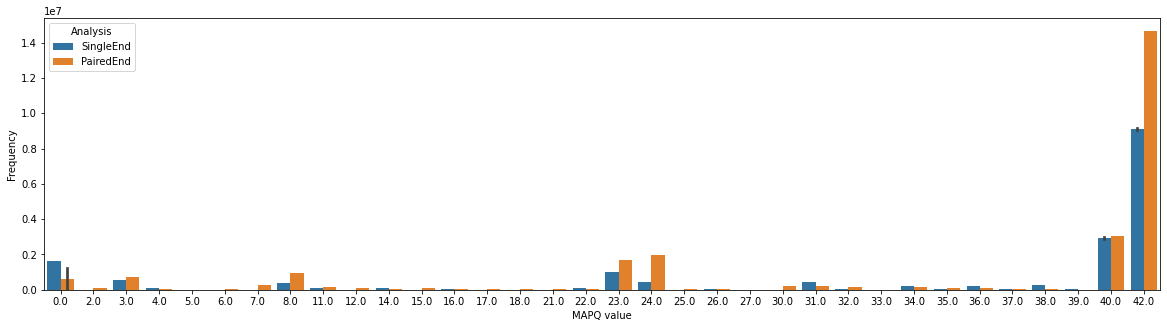

In [ ]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x="MAPQ value",y="Frequency",data=MAPQ_threshold, hue="Analysis")


It is difficult to see the differences between both files of single-ended alignment versus paired end alignment, so we will try again with another dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MAPQ_threshold_v1.csv to MAPQ_threshold_v1.csv


In [ ]:
import io
MAPQ_threshold_V1=pd.read_csv(io.BytesIO(uploaded['MAPQ_threshold_v1.csv']))

In [ ]:
MAPQ_threshold_V1.head()

,Analysis,Direction,Alignment,Frequency,MAPQ value
0,SingleEnd,R1,SingleEnd-R1,141,NaN
1,SingleEnd,R1,SingleEnd-R1,1619344,0.0
2,SingleEnd,R1,SingleEnd-R1,117887,11.0
3,SingleEnd,R1,SingleEnd-R1,5,12.0
4,SingleEnd,R1,SingleEnd-R1,123366,14.0


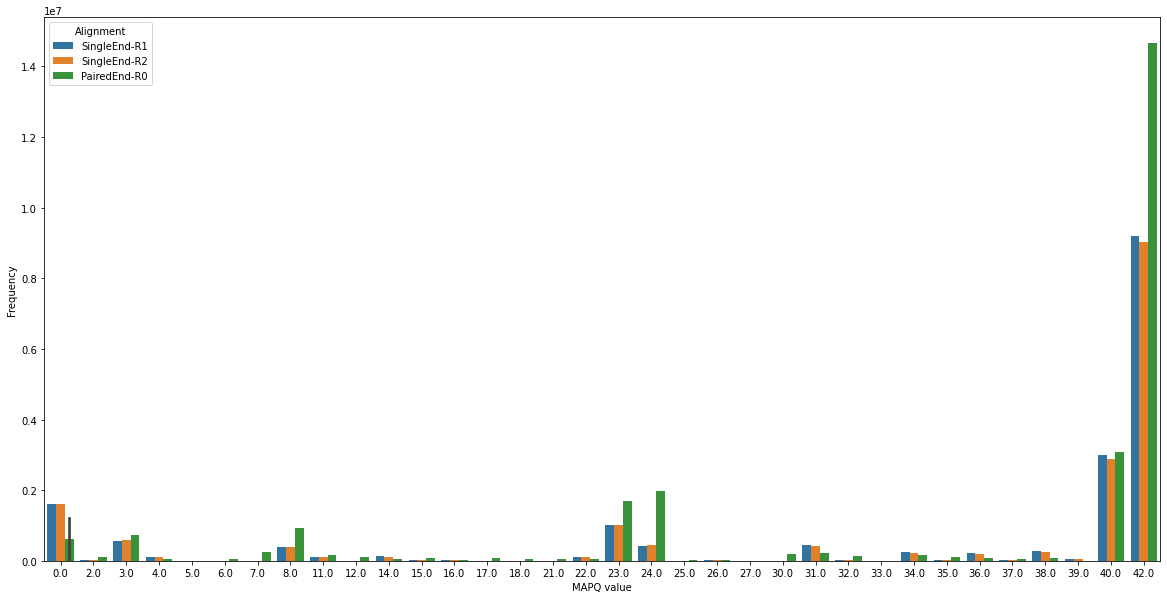

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x="MAPQ value",y="Frequency",data=MAPQ_threshold_V1, hue="Alignment")


There seems to be an error bar in the value 0, and I spotted a mistake in the data file. So, let's try again.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MAPQ_threshold_v2.csv to MAPQ_threshold_v2.csv


In [ ]:
import io
MAPQ_threshold_V2=pd.read_csv(io.BytesIO(uploaded['MAPQ_threshold_v2.csv']))

In [ ]:
MAPQ_threshold_V2.head()

,Analysis,Direction,Alignment,Frequency,MAPQ value
0,SingleEnd,R1,SingleEnd-R1,141,NaN
1,SingleEnd,R1,SingleEnd-R1,1619344,0.0
2,SingleEnd,R1,SingleEnd-R1,117887,11.0
3,SingleEnd,R1,SingleEnd-R1,5,12.0
4,SingleEnd,R1,SingleEnd-R1,123366,14.0


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.,
        12000000., 14000000., 16000000.]),
 <a list of 9 Text major ticklabel objects>)

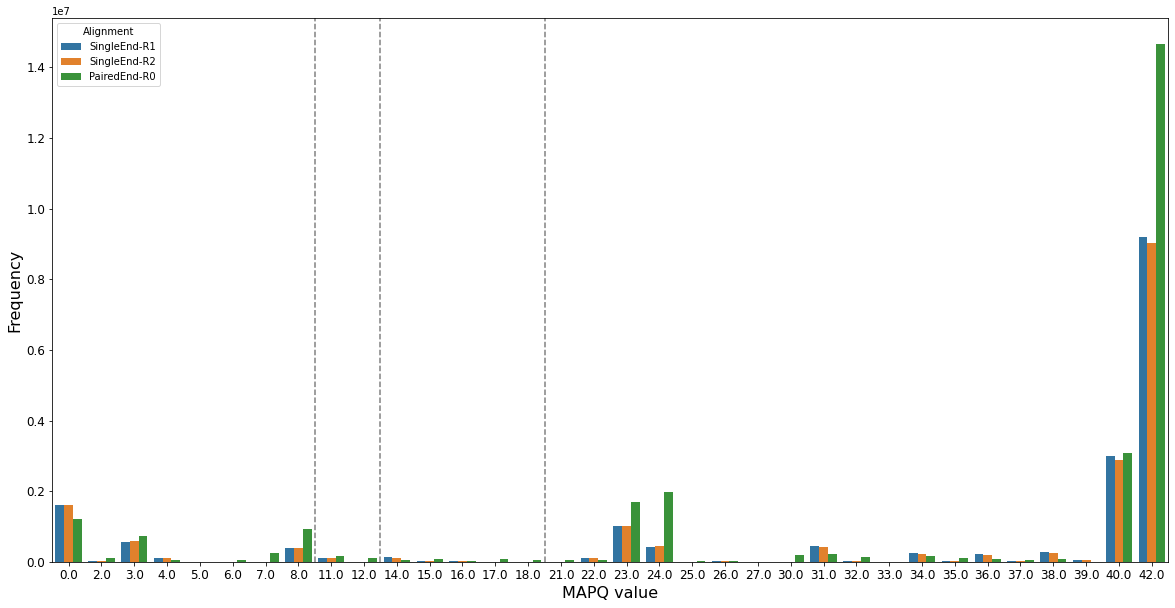

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x="MAPQ value",y="Frequency",data=MAPQ_threshold_V2, hue="Alignment")
plt.axvline(7.5, color='grey',linestyle="--")
plt.axvline(14.5, color='grey',linestyle="--")
plt.axvline(9.5, color='grey',linestyle="--")
plt.xlabel("MAPQ value",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


What does this mean?

AS:i:<N> aln score
XS:i:<N> aln score for next best aln (only reported if >1 aln found)

"true multireads" are those where AS=XS, 
"true unireads" are reads that have only a single mapping position in the scoring scheme, and 
"maxireads" include true unireads and reads where AS > XS. 

Mapping quality is related to "uniqueness." We say an alignment is unique if it has a much higher alignment score than all the other possible alignments. The bigger the gap between the best alignment's score and the second-best alignment's score, the more unique the best alignment, and the higher its mapping quality should be.

Accurate mapping qualities are useful for downstream tools like variant callers. For instance, a variant caller might choose to ignore evidence from alignments with mapping quality less than, say, 10. A mapping quality of 10 or less indicates that there is at least a 1 in 10 chance that the read truly originated elsewhere.

In [ ]:
MAPQ_threshold_V2_Paired=MAPQ_threshold_V2[MAPQ_threshold_V2['Alignment']=="PairedEnd-R0"]

In [ ]:
MAPQ_threshold_V2_Paired

,Analysis,Direction,Alignment,Frequency,MAPQ value
70,PairedEnd,NaN,PairedEnd-R0,141,NaN
71,PairedEnd,NaN,PairedEnd-R0,1217942,0.0
72,PairedEnd,NaN,PairedEnd-R0,158952,11.0
73,PairedEnd,NaN,PairedEnd-R0,99638,12.0
74,PairedEnd,NaN,PairedEnd-R0,58362,14.0
75,PairedEnd,NaN,PairedEnd-R0,82064,15.0
76,PairedEnd,NaN,PairedEnd-R0,33410,16.0
77,PairedEnd,NaN,PairedEnd-R0,71284,17.0
78,PairedEnd,NaN,PairedEnd-R0,52202,18.0
79,PairedEnd,NaN,PairedEnd-R0,93936,2.0


In [ ]:
MAPQ_threshold_V2_Paired.sum(axis=0)

Analysis      PairedEndPairedEndPairedEndPairedEndPairedEndP...
Direction                                                     0
Alignment     PairedEnd-R0PairedEnd-R0PairedEnd-R0PairedEnd-...
Frequency                                              26504377
MAPQ value                                                  700
dtype: object

In [ ]:
MAPQ_threshold_V2_Paired_Under8=MAPQ_threshold_V2_Paired[MAPQ_threshold_V2_Paired['MAPQ value']<=8]

In [ ]:
MAPQ_threshold_V2_Paired_Under8

,Analysis,Direction,Alignment,Frequency,MAPQ value
71,PairedEnd,NaN,PairedEnd-R0,1217942,0.0
79,PairedEnd,NaN,PairedEnd-R0,93936,2.0
87,PairedEnd,NaN,PairedEnd-R0,719972,3.0
97,PairedEnd,NaN,PairedEnd-R0,38978,4.0
100,PairedEnd,NaN,PairedEnd-R0,5266,5.0
101,PairedEnd,NaN,PairedEnd-R0,37964,6.0
102,PairedEnd,NaN,PairedEnd-R0,256864,7.0
103,PairedEnd,NaN,PairedEnd-R0,934574,8.0


In [ ]:
MAPQ_threshold_V2_Paired_Under8.sum(axis=0)

Analysis      PairedEndPairedEndPairedEndPairedEndPairedEndP...
Direction                                                     0
Alignment     PairedEnd-R0PairedEnd-R0PairedEnd-R0PairedEnd-...
Frequency                                               3305496
MAPQ value                                                   35
dtype: object

In [ ]:
Perc_Paired_Under8=(3305496/26504377)*100
Perc_Paired_Under8

12.471509894384614

In [ ]:
MAPQ_threshold_V2_Paired_Under12=MAPQ_threshold_V2_Paired[MAPQ_threshold_V2_Paired['MAPQ value']<=12]

In [ ]:
MAPQ_threshold_V2_Paired_Under12

,Analysis,Direction,Alignment,Frequency,MAPQ value
71,PairedEnd,NaN,PairedEnd-R0,1217942,0.0
72,PairedEnd,NaN,PairedEnd-R0,158952,11.0
73,PairedEnd,NaN,PairedEnd-R0,99638,12.0
79,PairedEnd,NaN,PairedEnd-R0,93936,2.0
87,PairedEnd,NaN,PairedEnd-R0,719972,3.0
97,PairedEnd,NaN,PairedEnd-R0,38978,4.0
100,PairedEnd,NaN,PairedEnd-R0,5266,5.0
101,PairedEnd,NaN,PairedEnd-R0,37964,6.0
102,PairedEnd,NaN,PairedEnd-R0,256864,7.0
103,PairedEnd,NaN,PairedEnd-R0,934574,8.0


In [ ]:
MAPQ_threshold_V2_Paired_Under12.sum(axis=0)

Analysis      PairedEndPairedEndPairedEndPairedEndPairedEndP...
Direction                                                     0
Alignment     PairedEnd-R0PairedEnd-R0PairedEnd-R0PairedEnd-...
Frequency                                               3564086
MAPQ value                                                   58
dtype: object

In [ ]:
Perc_Paired_Under12=(3564086/26504377)*100
Perc_Paired_Under12

13.447160067184374

In [ ]:
MAPQ_threshold_V2_Paired_Under18=MAPQ_threshold_V2_Paired[MAPQ_threshold_V2_Paired['MAPQ value']<=18]

In [ ]:
MAPQ_threshold_V2_Paired_Under18

,Analysis,Direction,Alignment,Frequency,MAPQ value
71,PairedEnd,NaN,PairedEnd-R0,1217942,0.0
72,PairedEnd,NaN,PairedEnd-R0,158952,11.0
73,PairedEnd,NaN,PairedEnd-R0,99638,12.0
74,PairedEnd,NaN,PairedEnd-R0,58362,14.0
75,PairedEnd,NaN,PairedEnd-R0,82064,15.0
76,PairedEnd,NaN,PairedEnd-R0,33410,16.0
77,PairedEnd,NaN,PairedEnd-R0,71284,17.0
78,PairedEnd,NaN,PairedEnd-R0,52202,18.0
79,PairedEnd,NaN,PairedEnd-R0,93936,2.0
87,PairedEnd,NaN,PairedEnd-R0,719972,3.0


In [ ]:
MAPQ_threshold_V2_Paired_Under18.sum(axis=0)

Analysis      PairedEndPairedEndPairedEndPairedEndPairedEndP...
Direction                                                     0
Alignment     PairedEnd-R0PairedEnd-R0PairedEnd-R0PairedEnd-...
Frequency                                               3861408
MAPQ value                                                  138
dtype: object

In [ ]:
Perc_Paired_Under18=(3861408/26504377)*100
Perc_Paired_Under18

14.568944593566565